주제선정 이유: 물질적인 풍요로움, 즉 일인당 GDP 가 과연 행복도 수치에 가장 큰 영향을 미치는지, 혹은 다른 요인이 더 중요한지 확인하기 위해

 또한 이 결과가 행복도 수치가 차이나는 국가들 사이에서도 적용되는지 확인하기 위해 이 주제를 선정하였다.

 대표 가설: GDP가 행복도를 결정하는 가장 큰 요인이 될 것이다

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/happiness.csv")

df = df.rename(columns={'Country name':'Country','Ladder score':'Happiness'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     137 non-null    object 
 1   Happiness                                   137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = df.loc[:,~df.columns.duplicated()]#중복
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     137 non-null    object 
 1   Happiness                                   137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

상관도가 음수거나 0에 가까운 열들 드랍.
Generosity, explained by: Generosity, Perceptions of corruption, Ladder score in Dystopia

In [ ]:
corr = df.corr()
corr['Happiness'].sort_values(ascending=False)


<ipython-input-62-36a8ddcf53b0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Happiness                                     1.000000
lowerwhisker                                  0.999448
upperwhisker                                  0.999401
Explained by: Social support                  0.834604
Social support                                0.834532
Logged GDP per capita                         0.784367
Explained by: Log GDP per capita              0.784342
Healthy life expectancy                       0.746928
Explained by: Healthy life expectancy         0.746699
Freedom to make life choices                  0.662924
Explained by: Freedom to make life choices    0.662909
Dystopia + residual                           0.494452
Explained by: Perceptions of corruption       0.471913
Generosity                                    0.044082
Explained by: Generosity                      0.043680
Perceptions of corruption                    -0.471911
Standard error of ladder score               -0.512628
Ladder score in Dystopia                           NaN
Name: Happ

In [ ]:

df = df[['Logged GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices','Happiness','Country']]

다중 변수 간 상관관계 확인(가설확인)
히트맵을 통해 행복도와 상관관계가 높은 변수들을 확인할 수 있음.
이때, 상관도가 클수록 더 진해지는 색상을 선
logged gdp per capita, social support, healthy life expectancy, freedom to make choices 4가지의 주요 변수들을 추릴 수 있음.



<ipython-input-64-8806b0ff21e5>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: title={'center': 'heatmap of the whole data'}>

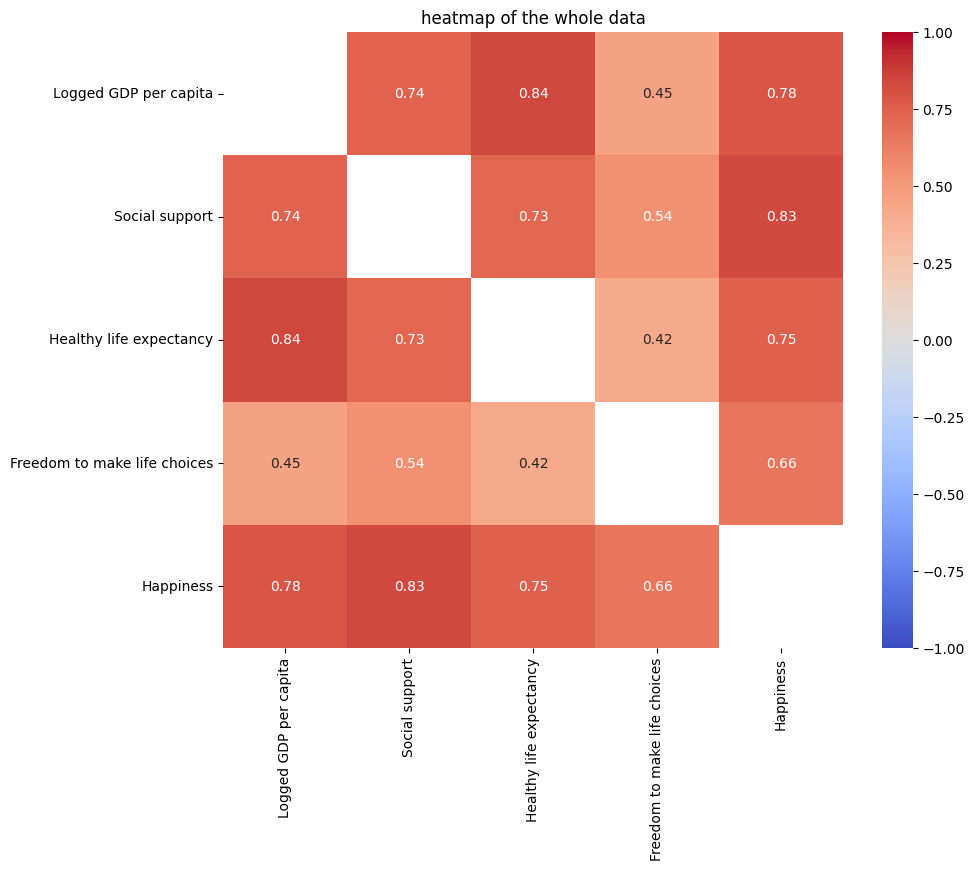

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
plt.title("heatmap of the whole data")
threshold = 0.4
correlation_matrix = df.corr()
high_correlation = (correlation_matrix.abs() > threshold) & (correlation_matrix != 1)
sns.heatmap(correlation_matrix[high_correlation], annot=True,cmap='coolwarm', vmin=-1, vmax=1)



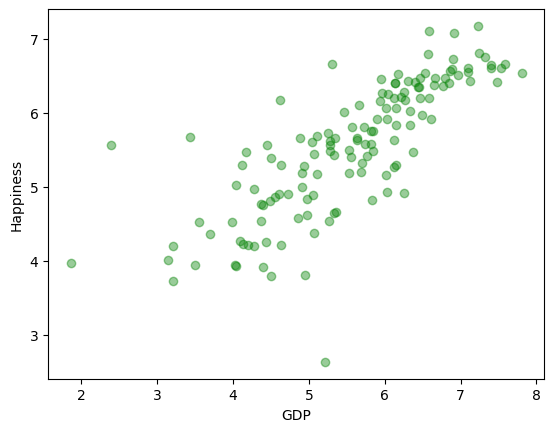

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
x = df[['Logged GDP per capita']]
y = df[['Happiness']]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
plt.scatter(y, y_pred, alpha=0.4,c='g')
plt.xlabel('GDP')
plt.ylabel('Happiness')
plt.show()

In [ ]:
df1=df.head(20)#행복도 상위 20개국
df2=df.tail(20)#행복도 하위 20개

나라의 행복수준별 결정 요인이 다른지 , 행복수준이 낮은나라와 높은 나라 모두 gdp가 가장 큰 결정요인인지 확인하려는 이유로 막대그래프로 국가별 행복도를 시각화함.

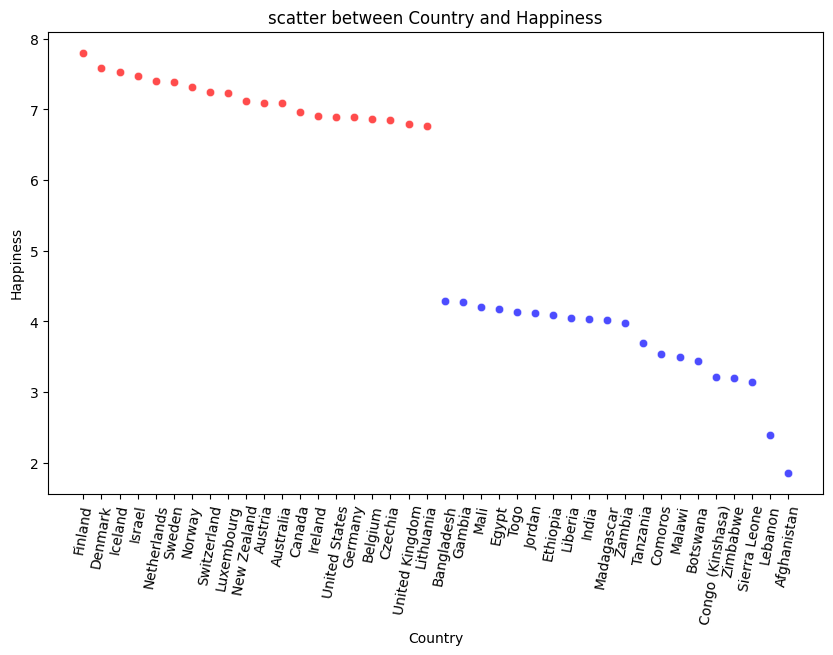

In [ ]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df1, x='Country', y='Happiness',c='red',alpha=0.7)
sns.scatterplot(data=df2, x='Country', y='Happiness',c='blue',alpha=0.7)
plt.xlabel('Country')
plt.xticks(rotation=80)
plt.ylabel('Happiness')
plt.title('scatter between Country and Happiness')
plt.show()

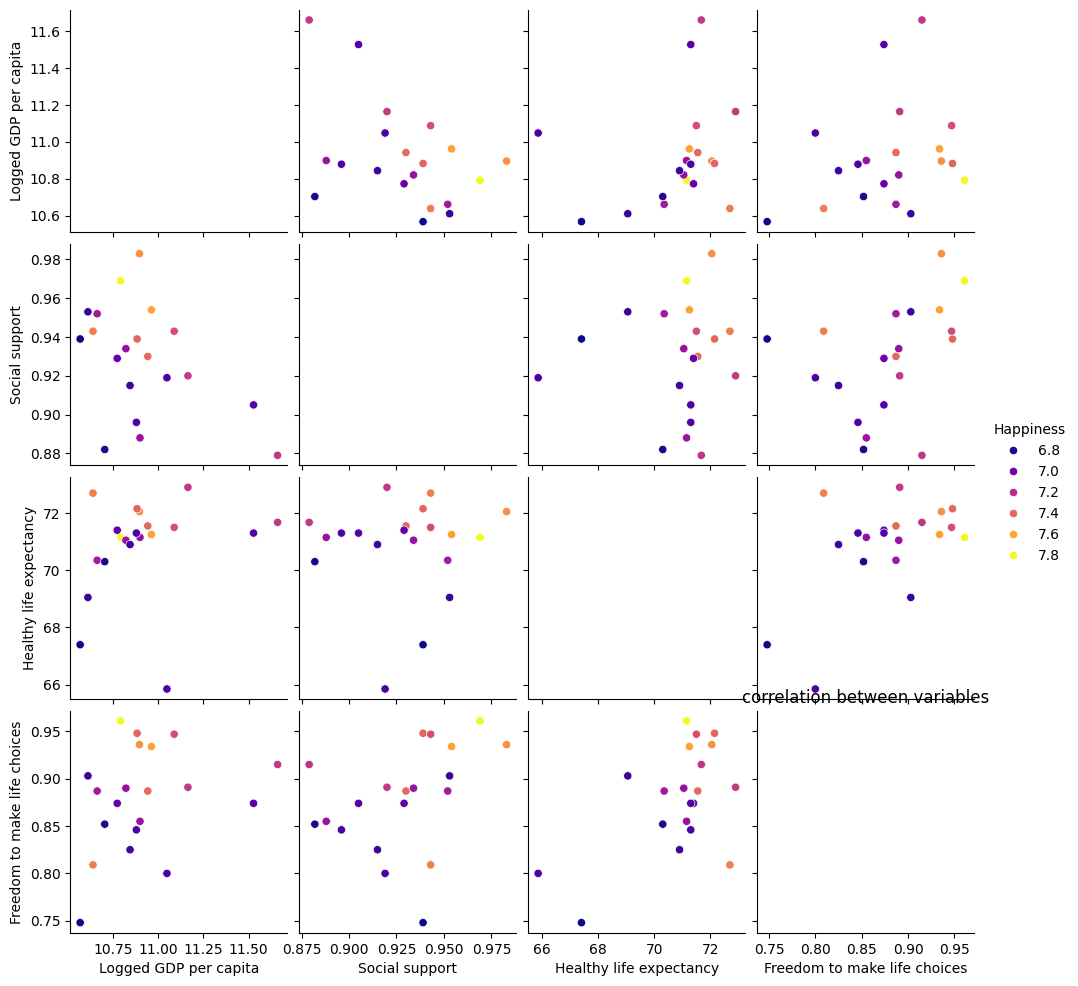

In [ ]:
sns.pairplot(df1, hue="Happiness",palette='plasma')
plt.title("correlation between variables")
plt.show() #상위 20개국 간 변수간 산점도 분포

In [ ]:
#축소된 df1과 df2에서 선형관계를 찾아보려했음

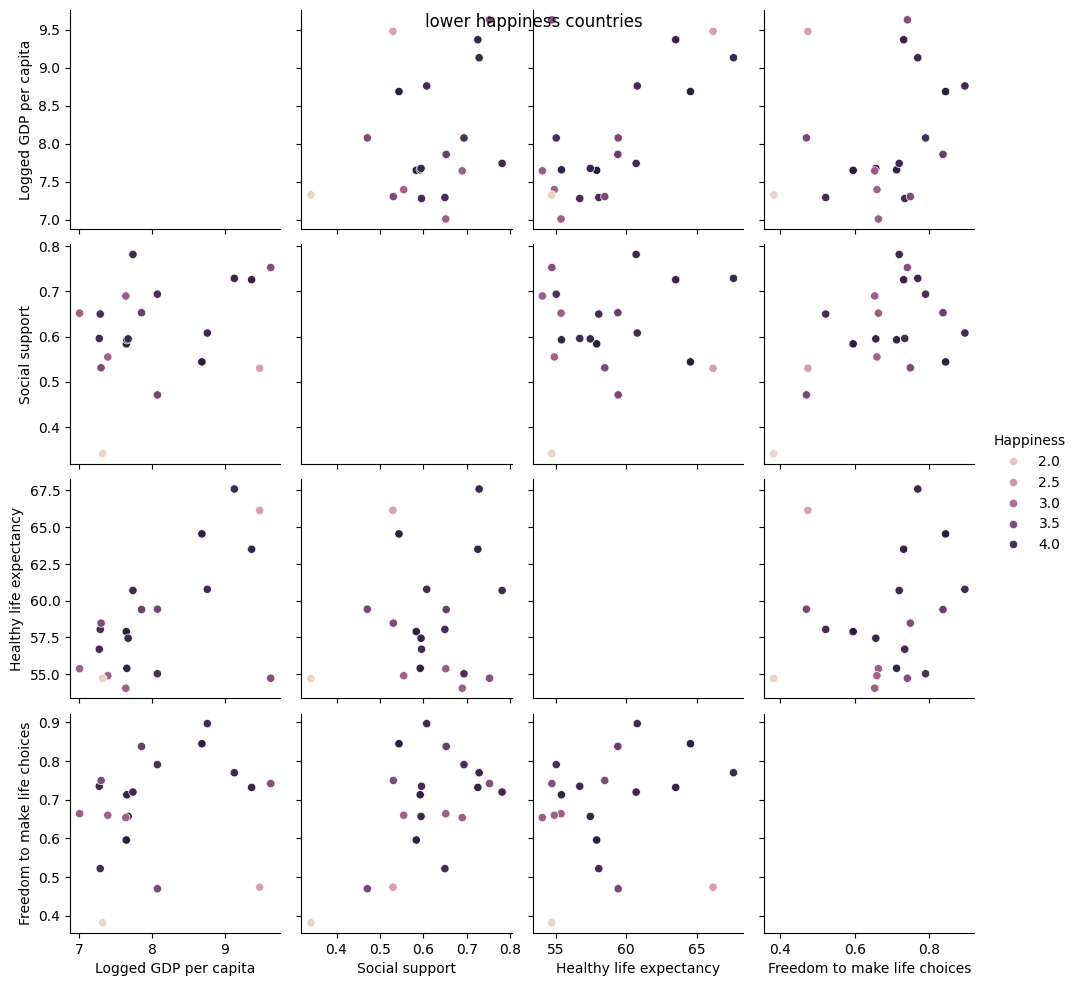

In [ ]:
sns.set_palette('muted')
sns.pairplot(data=df2, hue='below 20 countries')
plt.suptitle('lower happiness countries')
plt.show()

<ipython-input-15-8036bf1d7557>:4: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x="Logged GDP per capita", y="Happiness", data=df1, ax=axes[0], color="pink")
<ipython-input-15-8036bf1d7557>:8: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x="Logged GDP per capita", y="Happiness", data=df2, ax=axes[1], color="blue")


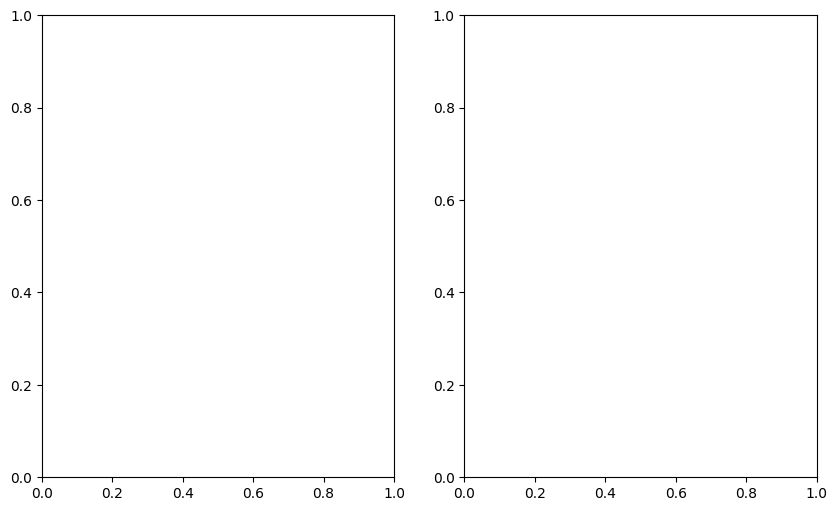

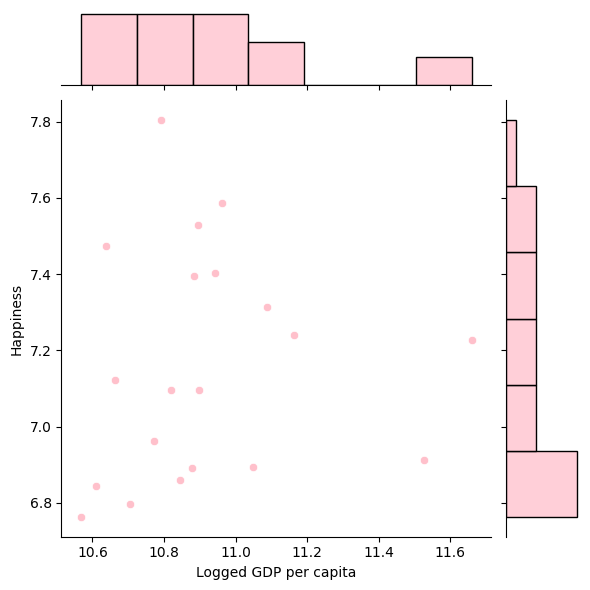

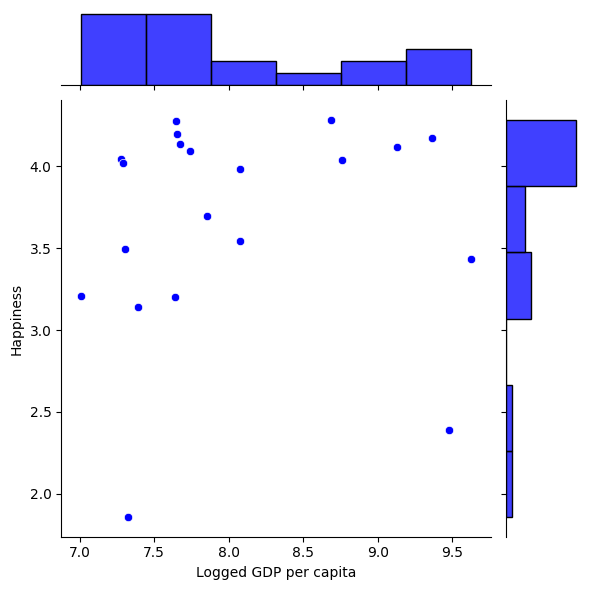

In [ ]:
#상위20개국 하위 20개국 gdp에 따른 행복도
# 서브플롯 생성
fig, axes = plt.subplots(1,2, figsize=(10, 6))  # 1행 2열의 서브플롯
sns.jointplot(x="Logged GDP per capita", y="Happiness", data=df1, ax=axes[0], color="pink")


# 두 번째 jointplot 그리기
sns.jointplot(x="Logged GDP per capita", y="Happiness", data=df2, ax=axes[1], color="blue")




결론: GDP 도 행복 수준에 큰 영향 미침, 하지만 상위 20개국가에선는 사회적 지원이 가장 중요했음.

Text(0.5, 1.0, 'Regression Line for Healthy life expectancy')

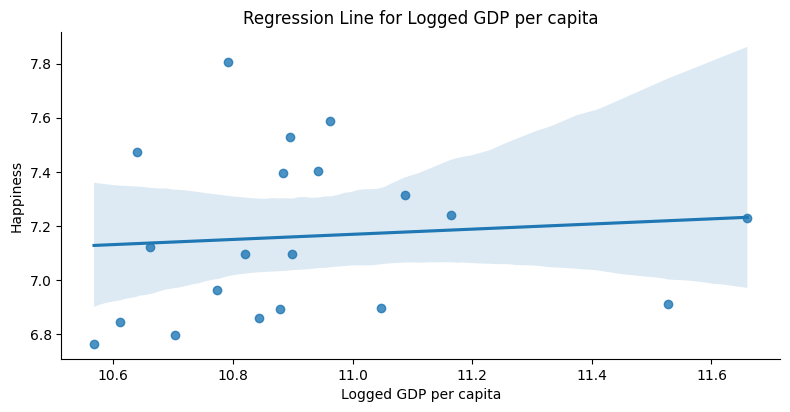

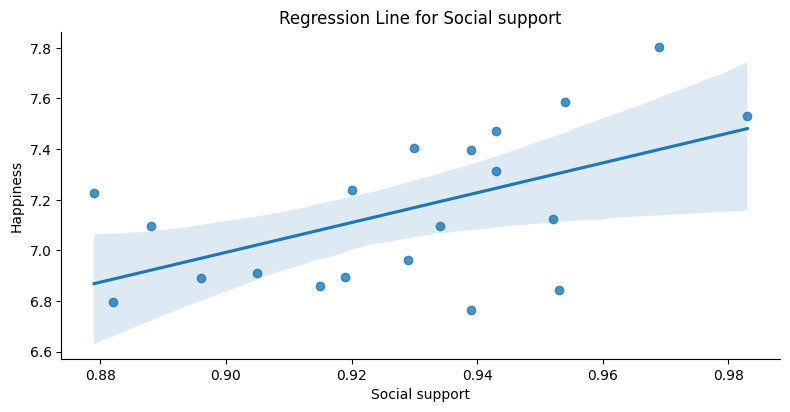

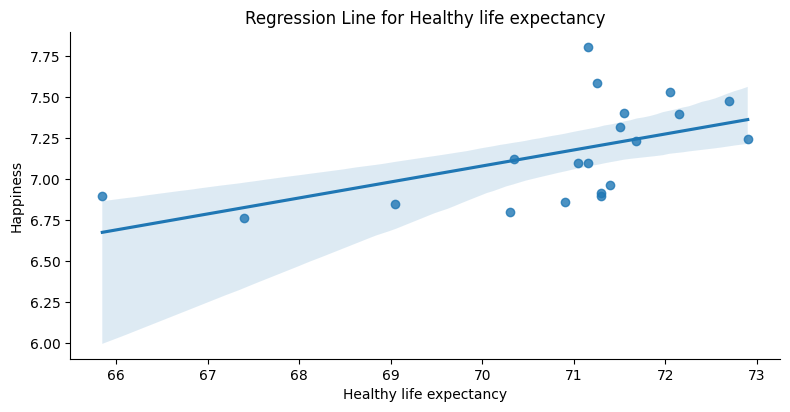

In [ ]:
import matplotlib.pyplot as plt #상위 20개국의 선형 회귀선  기울기 비교
import seaborn as sns
sns.lmplot(x='Logged GDP per capita', y='Happiness', data=df1, height=4, aspect=2)
plt.title('Regression Line for Logged GDP per capita')

sns.lmplot(x='Social support', y='Happiness', data=df1, height=4, aspect=2)
plt.title('Regression Line for Social support')

sns.lmplot(x='Healthy life expectancy', y='Happiness', data=df1, height=4, aspect=2)
plt.title('Regression Line for Healthy life expectancy')

Text(0.5, 1.0, 'Regression Line for Healthy life expectancy')

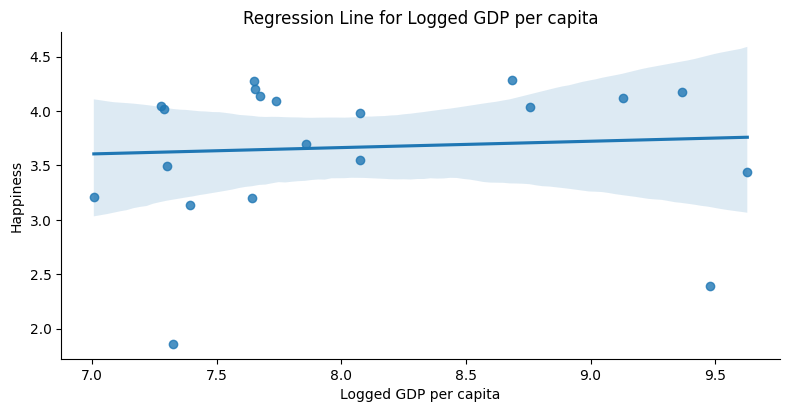

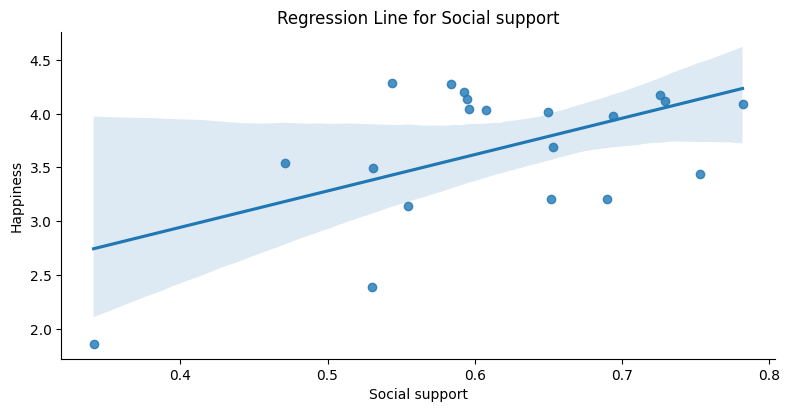

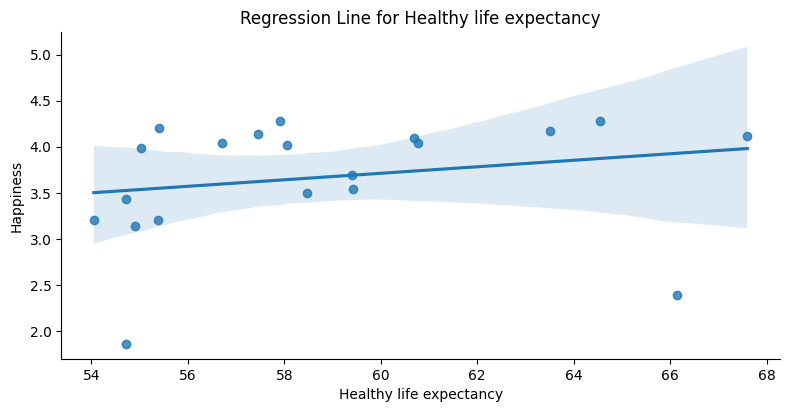

In [ ]:
import matplotlib.pyplot as plt #하위 20개국의 기울기 비교
import seaborn as sns
sns.lmplot(x='Logged GDP per capita', y='Happiness', data=df2, height=4, aspect=2)
plt.title('Regression Line for Logged GDP per capita')

sns.lmplot(x='Social support', y='Happiness', data=df2, height=4, aspect=2)
plt.title('Regression Line for Social support')

sns.lmplot(x='Healthy life expectancy', y='Happiness', data=df2, height=4, aspect=2)
plt.title('Regression Line for Healthy life expectancy')